In [1]:
# =========================================
# CONFIGURAÇÃO PARA GOOGLE COLAB
# =========================================
# Instala/Atualiza a biblioteca mlxtend (necessário no Colab)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Importação específica do Colab para upload de arquivos
import io

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


[1/4] Carregando dataset...

[2/4] Preparando...
✓ 48,693 registros após limpeza

[3/4] Criando transações...
✓ 48,693 transações válidas (com pelo menos 3 itens)

[4/4] Executando Apriori...
✓ 8 regras | Lift médio: 1.55

🏆 TOP 20 REGRAS (Ordenado por Lift)



,Antecedentes,Consequentes,support,confidence,lift
555,IDADE_15-29 + RACA_Parda,CAUSA_X700 + ESTCIV_Solteiro,0.078574,0.524973,1.669878
563,IDADE_15-29 + SEXO_masculino,CAUSA_X700 + ESTCIV_Solteiro,0.110468,0.516120,1.641718
473,ESC_8 a 11 anos + IDADE_15-29,CAUSA_X700 + ESTCIV_Solteiro,0.081634,0.514297,1.635919
436,ESC_4 a 7 anos + IDADE_15-29,CAUSA_X700 + ESTCIV_Solteiro,0.033475,0.505113,1.606707
162,IDADE_15-29,CAUSA_X700 + ESTCIV_Solteiro,0.140390,0.499525,1.588932
565,IDADE_15-29,CAUSA_X700 + ESTCIV_Solteiro + SEXO_masculino,0.110468,0.393058,1.544603
550,IDADE_15-29 + RACA_Branca,CAUSA_X700 + ESTCIV_Solteiro,0.049021,0.461702,1.468622
486,ESC_8 a 11 anos + RACA_Parda,CAUSA_X700 + ESTCIV_Solteiro,0.074446,0.399625,1.271162



🔬 TOP 10 CAUSAS MAIS PREDITAS

CAUSA_X700 + ESTCIV_Solteiro: 7 regras
CAUSA_X700 + ESTCIV_Solteiro + SEXO_masculino: 1 regras

👥 TOP 5 POR PERFIL (Lift)

Sexo:


,Antecedentes,Consequentes,confidence,lift
563,IDADE_15-29 + SEXO_masculino,CAUSA_X700 + ESTCIV_Solteiro,0.51612,1.641718


Idade:


,Antecedentes,Consequentes,confidence,lift
555,IDADE_15-29 + RACA_Parda,CAUSA_X700 + ESTCIV_Solteiro,0.524973,1.669878
563,IDADE_15-29 + SEXO_masculino,CAUSA_X700 + ESTCIV_Solteiro,0.516120,1.641718
473,ESC_8 a 11 anos + IDADE_15-29,CAUSA_X700 + ESTCIV_Solteiro,0.514297,1.635919
436,ESC_4 a 7 anos + IDADE_15-29,CAUSA_X700 + ESTCIV_Solteiro,0.505113,1.606707
162,IDADE_15-29,CAUSA_X700 + ESTCIV_Solteiro,0.499525,1.588932


Raça:


,Antecedentes,Consequentes,confidence,lift
555,IDADE_15-29 + RACA_Parda,CAUSA_X700 + ESTCIV_Solteiro,0.524973,1.669878
550,IDADE_15-29 + RACA_Branca,CAUSA_X700 + ESTCIV_Solteiro,0.461702,1.468622
486,ESC_8 a 11 anos + RACA_Parda,CAUSA_X700 + ESTCIV_Solteiro,0.399625,1.271162


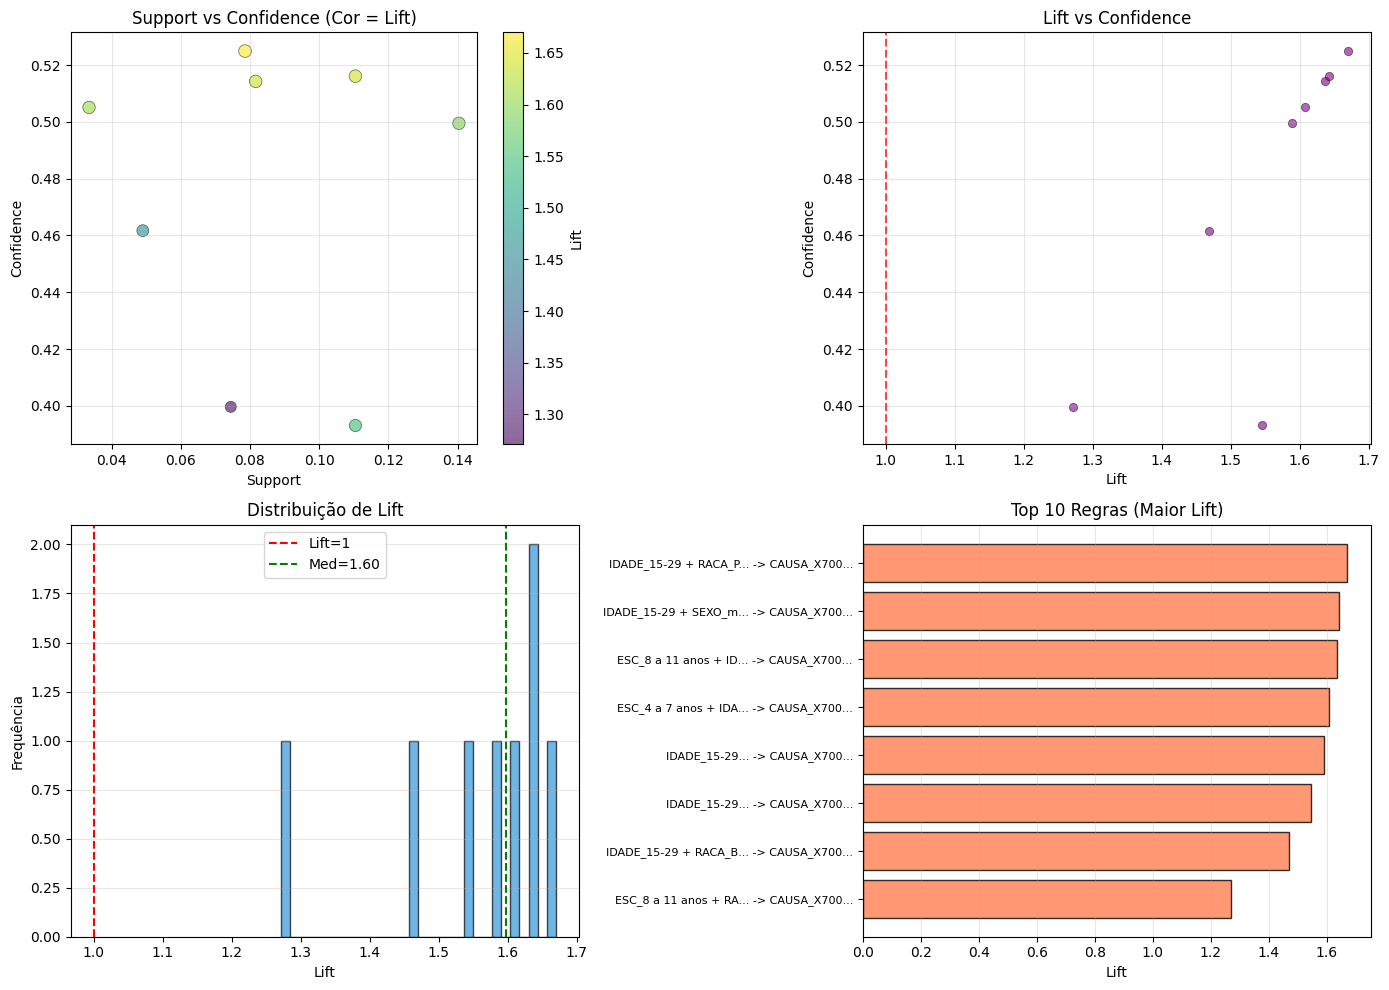


✅ Concluído!
Total de regras encontradas: 8
Confiança média: 47.7%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# ========== CARREGAR ==========
print('[1/4] Carregando dataset...')
# Alterado para o novo arquivo que você enviou
df = pd.read_csv('df_2020_limpo.csv')

# ========== PREPARAR ==========
print('\n[2/4] Preparando...')
df = df.dropna(thresh=int(0.6 * len(df.columns)))

# Categorizar
# Mantendo a mesma lógica de categorização solicitada
cols_to_process = {
    'IDADE': lambda x: f"IDADE_{int(x)//15*15}-{int(x)//15*15+14}" if pd.notna(x) and x >= 0 else None,
    'CAUSABAS': lambda x: f"CAUSA_{str(x).strip().upper()}" if pd.notna(x) else None,
    'SEXO': lambda x: f"SEXO_{x}" if pd.notna(x) else None,
    'RACACOR': lambda x: f"RACA_{x}" if pd.notna(x) else None,
    'ESTCIV': lambda x: f"ESTCIV_{x}" if pd.notna(x) else None,
    'ESC': lambda x: f"ESC_{x}" if pd.notna(x) else None
}

new_cols_map = {
    'IDADE': 'IDADE_CAT', 'CAUSABAS': 'CAUSA_CAT', 'SEXO': 'SEXO_CAT',
    'RACACOR': 'RACA_CAT', 'ESTCIV': 'ESTCIV_CAT', 'ESC': 'ESC_CAT'
}

for source_col, func in cols_to_process.items():
    if source_col in df.columns:
        df[new_cols_map[source_col]] = df[source_col].apply(func)
    else:
        print(f"Aviso: Coluna '{source_col}' não encontrada no dataset.")
        # Cria a coluna vazia para não quebrar o próximo passo
        df[new_cols_map[source_col]] = None

print(f'✓ {len(df):,} registros após limpeza')

# ========== TRANSAÇÕES ==========
print('\n[3/4] Criando transações...')
colunas_cat = ['IDADE_CAT', 'CAUSA_CAT', 'SEXO_CAT', 'RACA_CAT', 'ESTCIV_CAT', 'ESC_CAT']
# Verifica se todas as colunas necessárias existem (caso alguma tenha falhado acima)
colunas_existentes = [col for col in colunas_cat if col in df.columns]

transactions = df[colunas_existentes].apply(lambda row: row.dropna().tolist(), axis=1).tolist()
# Filtra transações muito curtas
transactions = [t for t in transactions if len(t) >= 3]
print(f'✓ {len(transactions):,} transações válidas (com pelo menos 3 itens)')

if len(transactions) == 0:
     print("\nErro Crítico: Nenhuma transação válida encontrada. Verifique os dados.")
else:
    # ========== APRIORI ==========
    print('\n[4/4] Executando Apriori...')
    # Parâmetros mantidos conforme seu script original
    MIN_SUPPORT, MIN_CONFIDENCE, MIN_LIFT = 0.03, 0.35, 1.2

    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Gera itemsets frequentes
    itemsets = apriori(df_encoded, min_support=MIN_SUPPORT, use_colnames=True, max_len=4)

    if len(itemsets) == 0:
        print('⚠ Nenhum itemset! Reduza MIN_SUPPORT')
    else:
        # Gera regras
        rules = association_rules(itemsets, metric="confidence", min_threshold=MIN_CONFIDENCE)

        # Garante cálculo do Lift e filtragem secundária
        if 'lift' not in rules.columns:
             rules = association_rules(itemsets, metric="lift", min_threshold=MIN_LIFT)
             rules = rules[rules['confidence'] >= MIN_CONFIDENCE].copy()
        else:
             rules = rules[rules['lift'] >= MIN_LIFT].copy()

        if len(rules) == 0:
            print('⚠ Nenhuma regra! Reduza MIN_CONFIDENCE ou MIN_LIFT')
        else:
            # Formatação visual
            rules['Antecedentes'] = rules['antecedents'].apply(lambda x: ' + '.join(sorted(list(x))))
            rules['Consequentes'] = rules['consequents'].apply(lambda x: ' + '.join(sorted(list(x))))

            # Foco: Regras que predizem a CAUSA (se houver)
            rules_causa = rules[rules['Consequentes'].str.contains('CAUSA_', na=False)].copy()
            rules_final = rules_causa if len(rules_causa) > 0 else rules

            # ========== RESULTADOS ==========
            print(f'✓ {len(rules_final):,} regras | Lift médio: {rules_final["lift"].mean():.2f}')
            
            print('\n🏆 TOP 20 REGRAS (Ordenado por Lift)\n')
            display(rules_final.nlargest(20, 'lift')[['Antecedentes', 'Consequentes', 'support', 'confidence', 'lift']])

            # Top causas (se aplicável)
            if len(rules_causa) > 0:
                print(f'\n🔬 TOP 10 CAUSAS MAIS PREDITAS\n')
                for causa, freq in rules_causa['Consequentes'].value_counts().head(10).items():
                    print(f'{causa}: {freq} regras')

            # Perfis demográficos
            print('\n👥 TOP 5 POR PERFIL (Lift)\n')
            for filtro, titulo in [('SEXO_', 'Sexo'), ('IDADE_', 'Idade'), ('RACA_', 'Raça')]:
                regras = rules_final[rules_final['Antecedentes'].str.contains(filtro, na=False)].nlargest(5, 'lift')
                if len(regras) > 0:
                    print(f'{titulo}:')
                    display(regras[['Antecedentes', 'Consequentes', 'confidence', 'lift']])

            # ========== GRÁFICOS ==========
            if len(rules_final) > 0:
                fig, axes = plt.subplots(2, 2, figsize=(14, 10))

                # Scatter: Support vs Confidence
                scatter = axes[0, 0].scatter(rules_final['support'], rules_final['confidence'],
                                            c=rules_final['lift'], s=rules_final['lift']*50,
                                            alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.5)
                axes[0, 0].set_xlabel('Support')
                axes[0, 0].set_ylabel('Confidence')
                axes[0, 0].set_title('Support vs Confidence (Cor = Lift)')
                axes[0, 0].grid(alpha=0.3)
                plt.colorbar(scatter, ax=axes[0, 0], label='Lift')

                # Scatter: Lift vs Confidence
                axes[0, 1].scatter(rules_final['lift'], rules_final['confidence'],
                                  alpha=0.6, edgecolors='black', linewidth=0.5, color='purple')
                axes[0, 1].axvline(x=1, color='red', linestyle='--', alpha=0.7)
                axes[0, 1].set_xlabel('Lift')
                axes[0, 1].set_ylabel('Confidence')
                axes[0, 1].set_title('Lift vs Confidence')
                axes[0, 1].grid(alpha=0.3)

                # Histograma: Distribuição Lift
                axes[1, 0].hist(rules_final['lift'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
                axes[1, 0].axvline(x=1, color='red', linestyle='--', label='Lift=1')
                axes[1, 0].axvline(x=rules_final['lift'].median(), color='green', linestyle='--', label=f"Med={rules_final['lift'].median():.2f}")
                axes[1, 0].set_xlabel('Lift')
                axes[1, 0].set_ylabel('Frequência')
                axes[1, 0].set_title('Distribuição de Lift')
                axes[1, 0].legend()
                axes[1, 0].grid(alpha=0.3, axis='y')

                # Bar Chart: Top 10 Regras
                top10 = rules_final.nlargest(10, 'lift').sort_values('lift')
                if len(top10) > 0:
                    labels = [f"{r['Antecedentes'][:20]}... -> {r['Consequentes'][:10]}..." for _, r in top10.iterrows()]
                    axes[1, 1].barh(range(len(top10)), top10['lift'], color='coral', alpha=0.8, edgecolor='black')
                    axes[1, 1].set_yticks(range(len(top10)))
                    axes[1, 1].set_yticklabels(labels, fontsize=8)
                    axes[1, 1].set_xlabel('Lift')
                    axes[1, 1].set_title('Top 10 Regras (Maior Lift)')
                    axes[1, 1].grid(alpha=0.3, axis='x')

                plt.tight_layout()
                plt.show()

            # ========== SALVAR ==========
            output_filename = 'regras_causas_morte_2020.csv'
            rules_final[['Antecedentes', 'Consequentes', 'support', 'confidence', 'lift']].sort_values(
                'lift', ascending=False).to_csv(output_filename, index=False, encoding='utf-8-sig')

            print('\n✅ Concluído!')
            print(f'Total de regras encontradas: {len(rules_final):,}')
            print(f'Confiança média: {rules_final["confidence"].mean():.1%}')
